In [1]:
import os

import numpy as np
import pandas as pd

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
basepath = raw_data_path + "/Imaging/Optogenetics"
paths = direcslist(basepath, 2)

imgs = [load_image(p + "/rfp_channel_flat.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

In [3]:
# Load reference profiles
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
membg1 = np.loadtxt("../../data/calibration_mem1.txt")
membg2 = np.loadtxt("../../data/calibration_mem2.txt")
membg3 = np.loadtxt("../../data/calibration_mem3.txt")
membg4 = np.loadtxt("../../data/calibration_mem4.txt")
membg5 = np.loadtxt("../../data/calibration_mem5.txt")
membg6 = np.loadtxt("../../data/calibration_mem6.txt")

In [4]:
# Global calibration parameterrs
kwargs_dict = {"lr": 0.005, "descent_steps": 600}

### Quantification 0
Naive - uses error function and gaussian

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<05:50,  1.71it/s]

  1%|█▍                                                                                                         | 8/600 [00:00<00:41, 14.24it/s]

  2%|██▍                                                                                                       | 14/600 [00:00<00:24, 23.72it/s]

  3%|███▌                                                                                                      | 20/600 [00:00<00:18, 31.83it/s]

  4%|████▊                                                                                                     | 27/600 [00:01<00:14, 39.65it/s]

  6%|█████▊                                                                                                    | 33/600 [00:01<00:13, 43.13it/s]

  6%|██████▉                                                                                                   | 39/600 [00:01<00:11, 47.46it/s]

  8%|████████▏                                                                                                 | 46/600 [00:01<00:10, 52.28it/s]

  9%|█████████▏                                                                                                | 52/600 [00:01<00:10, 53.64it/s]

 10%|██████████▍                                                                                               | 59/600 [00:01<00:09, 57.18it/s]

 11%|███████████▊                                                                                              | 67/600 [00:01<00:08, 61.48it/s]

 12%|█████████████▎                                                                                            | 75/600 [00:01<00:08, 64.49it/s]

 14%|██████████████▋                                                                                           | 83/600 [00:01<00:07, 66.36it/s]

 15%|███████████████▉                                                                                          | 90/600 [00:02<00:08, 57.61it/s]

 16%|█████████████████▏                                                                                        | 97/600 [00:02<00:09, 54.59it/s]

 17%|██████████████████                                                                                       | 103/600 [00:02<00:08, 55.76it/s]

 18%|███████████████████                                                                                      | 109/600 [00:02<00:08, 56.62it/s]

 19%|████████████████████▎                                                                                    | 116/600 [00:02<00:08, 60.11it/s]

 20%|█████████████████████▌                                                                                   | 123/600 [00:02<00:07, 62.44it/s]

 22%|██████████████████████▉                                                                                  | 131/600 [00:02<00:07, 65.59it/s]

 23%|████████████████████████▏                                                                                | 138/600 [00:02<00:07, 64.46it/s]

 24%|█████████████████████████▍                                                                               | 145/600 [00:02<00:06, 66.01it/s]

 26%|██████████████████████████▊                                                                              | 153/600 [00:03<00:06, 67.27it/s]

 27%|████████████████████████████▏                                                                            | 161/600 [00:03<00:06, 68.23it/s]

 28%|█████████████████████████████▍                                                                           | 168/600 [00:03<00:06, 66.31it/s]

 29%|██████████████████████████████▊                                                                          | 176/600 [00:03<00:06, 67.61it/s]

 31%|████████████████████████████████▏                                                                        | 184/600 [00:03<00:06, 68.84it/s]

 32%|█████████████████████████████████▌                                                                       | 192/600 [00:03<00:05, 69.64it/s]

 33%|██████████████████████████████████▊                                                                      | 199/600 [00:03<00:05, 69.66it/s]

 34%|████████████████████████████████████▏                                                                    | 207/600 [00:03<00:05, 71.08it/s]

 36%|█████████████████████████████████████▋                                                                   | 215/600 [00:03<00:05, 71.31it/s]

 37%|███████████████████████████████████████                                                                  | 223/600 [00:04<00:05, 72.23it/s]

 38%|████████████████████████████████████████▍                                                                | 231/600 [00:04<00:05, 73.14it/s]

 40%|█████████████████████████████████████████▊                                                               | 239/600 [00:04<00:04, 73.07it/s]

 41%|███████████████████████████████████████████▏                                                             | 247/600 [00:04<00:04, 73.23it/s]

 42%|████████████████████████████████████████████▋                                                            | 255/600 [00:04<00:04, 72.01it/s]

 44%|██████████████████████████████████████████████                                                           | 263/600 [00:04<00:04, 72.96it/s]

 45%|███████████████████████████████████████████████▍                                                         | 271/600 [00:04<00:04, 72.30it/s]

 46%|████████████████████████████████████████████████▊                                                        | 279/600 [00:04<00:04, 72.28it/s]

 48%|██████████████████████████████████████████████████▏                                                      | 287/600 [00:04<00:04, 72.97it/s]

 49%|███████████████████████████████████████████████████▋                                                     | 295/600 [00:05<00:04, 73.71it/s]

 50%|█████████████████████████████████████████████████████                                                    | 303/600 [00:05<00:03, 75.04it/s]

 52%|██████████████████████████████████████████████████████▍                                                  | 311/600 [00:05<00:03, 76.39it/s]

 53%|████████████████████████████████████████████████████████                                                 | 320/600 [00:05<00:03, 78.37it/s]

 55%|█████████████████████████████████████████████████████████▍                                               | 328/600 [00:05<00:03, 78.36it/s]

 56%|██████████████████████████████████████████████████████████▊                                              | 336/600 [00:05<00:03, 78.60it/s]

 57%|████████████████████████████████████████████████████████████▎                                            | 345/600 [00:05<00:03, 79.56it/s]

 59%|█████████████████████████████████████████████████████████████▊                                           | 353/600 [00:05<00:03, 74.38it/s]

 60%|███████████████████████████████████████████████████████████████▏                                         | 361/600 [00:05<00:03, 69.65it/s]

 62%|████████████████████████████████████████████████████████████████▌                                        | 369/600 [00:06<00:03, 70.30it/s]

 63%|█████████████████████████████████████████████████████████████████▉                                       | 377/600 [00:06<00:03, 70.27it/s]

 64%|███████████████████████████████████████████████████████████████████▍                                     | 385/600 [00:06<00:03, 69.70it/s]

 66%|████████████████████████████████████████████████████████████████████▊                                    | 393/600 [00:06<00:02, 70.03it/s]

 67%|██████████████████████████████████████████████████████████████████████▏                                  | 401/600 [00:06<00:02, 70.11it/s]

 68%|███████████████████████████████████████████████████████████████████████▌                                 | 409/600 [00:06<00:02, 66.95it/s]

 69%|████████████████████████████████████████████████████████████████████████▊                                | 416/600 [00:06<00:02, 65.15it/s]

 70%|██████████████████████████████████████████████████████████████████████████                               | 423/600 [00:06<00:02, 65.70it/s]

 72%|███████████████████████████████████████████████████████████████████████████▎                             | 430/600 [00:06<00:02, 62.69it/s]

 73%|████████████████████████████████████████████████████████████████████████████▍                            | 437/600 [00:07<00:02, 64.05it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▉                           | 445/600 [00:07<00:02, 67.81it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▍                         | 454/600 [00:07<00:02, 71.97it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████                        | 463/600 [00:07<00:01, 75.28it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▌                      | 472/600 [00:07<00:01, 76.99it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████▏                    | 481/600 [00:07<00:01, 78.66it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▊                   | 490/600 [00:07<00:01, 79.90it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 499/600 [00:07<00:01, 80.32it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 508/600 [00:07<00:01, 80.43it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▍              | 517/600 [00:08<00:01, 80.83it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████             | 526/600 [00:08<00:00, 80.82it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▋           | 535/600 [00:08<00:00, 81.34it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 544/600 [00:08<00:00, 81.45it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████▊        | 553/600 [00:08<00:00, 79.25it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▏      | 561/600 [00:08<00:00, 77.89it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▌     | 569/600 [00:08<00:00, 76.45it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 577/600 [00:08<00:00, 75.75it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 585/600 [00:08<00:00, 74.83it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 593/600 [00:09<00:00, 74.41it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 65.65it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

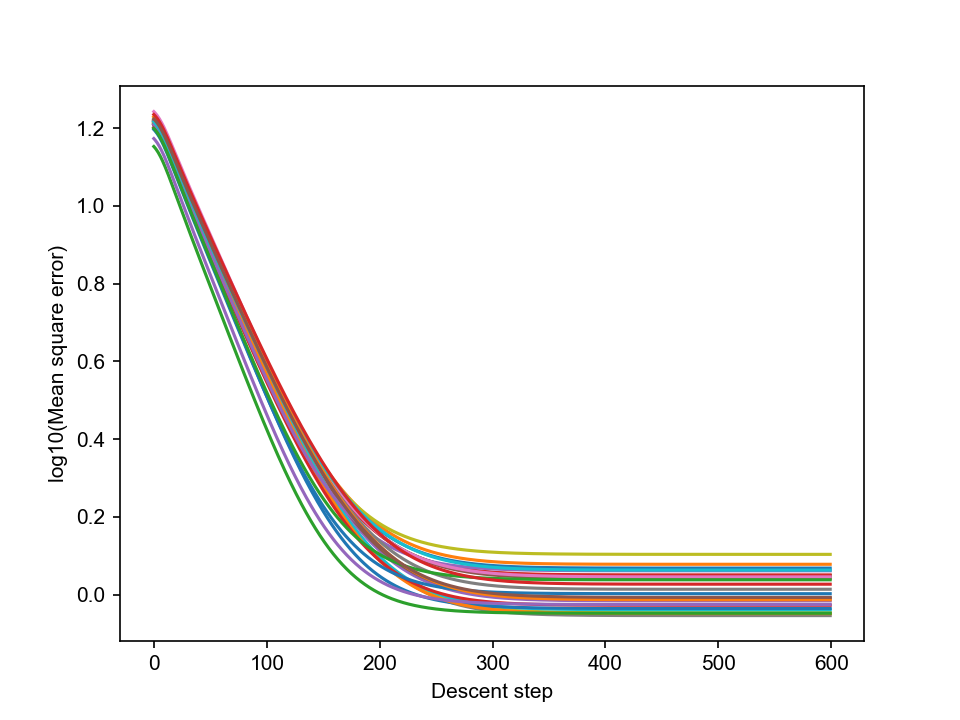

In [5]:
iq0 = ImageQuant2(img=imgs, roi=rois)
iq0.quantify(**kwargs_dict)
res0 = iq0.compile_res()
iq0.plot_losses(log=True)

### Quantification 1

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<02:35,  3.86it/s]

  2%|█▌                                                                                                         | 9/600 [00:00<00:19, 30.94it/s]

  3%|███▏                                                                                                      | 18/600 [00:00<00:11, 49.00it/s]

  4%|████▊                                                                                                     | 27/600 [00:00<00:09, 59.98it/s]

  6%|██████▎                                                                                                   | 36/600 [00:00<00:08, 66.82it/s]

  8%|███████▉                                                                                                  | 45/600 [00:00<00:07, 71.16it/s]

  9%|█████████▌                                                                                                | 54/600 [00:00<00:07, 74.46it/s]

 10%|██████████▉                                                                                               | 62/600 [00:01<00:07, 75.68it/s]

 12%|████████████▎                                                                                             | 70/600 [00:01<00:07, 73.42it/s]

 13%|█████████████▉                                                                                            | 79/600 [00:01<00:06, 75.65it/s]

 15%|███████████████▌                                                                                          | 88/600 [00:01<00:06, 77.23it/s]

 16%|█████████████████▏                                                                                        | 97/600 [00:01<00:06, 78.52it/s]

 18%|██████████████████▌                                                                                      | 106/600 [00:01<00:06, 79.20it/s]

 19%|████████████████████▏                                                                                    | 115/600 [00:01<00:06, 79.59it/s]

 21%|█████████████████████▋                                                                                   | 124/600 [00:01<00:05, 80.22it/s]

 22%|███████████████████████▎                                                                                 | 133/600 [00:01<00:05, 80.79it/s]

 24%|████████████████████████▊                                                                                | 142/600 [00:02<00:05, 80.90it/s]

 25%|██████████████████████████▍                                                                              | 151/600 [00:02<00:05, 79.97it/s]

 27%|████████████████████████████                                                                             | 160/600 [00:02<00:05, 79.96it/s]

 28%|█████████████████████████████▌                                                                           | 169/600 [00:02<00:05, 80.42it/s]

 30%|███████████████████████████████▏                                                                         | 178/600 [00:02<00:05, 80.88it/s]

 31%|████████████████████████████████▋                                                                        | 187/600 [00:02<00:05, 80.82it/s]

 33%|██████████████████████████████████▎                                                                      | 196/600 [00:02<00:04, 80.92it/s]

 34%|███████████████████████████████████▉                                                                     | 205/600 [00:02<00:04, 80.81it/s]

 36%|█████████████████████████████████████▍                                                                   | 214/600 [00:02<00:04, 80.63it/s]

 37%|███████████████████████████████████████                                                                  | 223/600 [00:03<00:04, 80.86it/s]

 39%|████████████████████████████████████████▌                                                                | 232/600 [00:03<00:04, 80.61it/s]

 40%|██████████████████████████████████████████▏                                                              | 241/600 [00:03<00:04, 80.38it/s]

 42%|███████████████████████████████████████████▊                                                             | 250/600 [00:03<00:04, 80.75it/s]

 43%|█████████████████████████████████████████████▎                                                           | 259/600 [00:03<00:04, 76.04it/s]

 44%|██████████████████████████████████████████████▋                                                          | 267/600 [00:03<00:04, 68.25it/s]

 46%|███████████████████████████████████████████████▉                                                         | 274/600 [00:03<00:04, 65.74it/s]

 47%|█████████████████████████████████████████████████▎                                                       | 282/600 [00:03<00:04, 68.71it/s]

 48%|██████████████████████████████████████████████████▊                                                      | 290/600 [00:03<00:04, 70.19it/s]

 50%|████████████████████████████████████████████████████▏                                                    | 298/600 [00:04<00:04, 70.95it/s]

 51%|█████████████████████████████████████████████████████▌                                                   | 306/600 [00:04<00:04, 70.03it/s]

 52%|██████████████████████████████████████████████████████▉                                                  | 314/600 [00:04<00:04, 70.98it/s]

 54%|████████████████████████████████████████████████████████▎                                                | 322/600 [00:04<00:03, 71.46it/s]

 55%|█████████████████████████████████████████████████████████▊                                               | 330/600 [00:04<00:03, 73.31it/s]

 56%|███████████████████████████████████████████████████████████▏                                             | 338/600 [00:04<00:03, 74.96it/s]

 58%|████████████████████████████████████████████████████████████▌                                            | 346/600 [00:04<00:03, 72.99it/s]

 59%|█████████████████████████████████████████████████████████████▉                                           | 354/600 [00:04<00:03, 73.82it/s]

 60%|███████████████████████████████████████████████████████████████▎                                         | 362/600 [00:04<00:03, 74.91it/s]

 62%|████████████████████████████████████████████████████████████████▊                                        | 370/600 [00:05<00:03, 72.01it/s]

 63%|██████████████████████████████████████████████████████████████████▏                                      | 378/600 [00:05<00:03, 67.24it/s]

 64%|███████████████████████████████████████████████████████████████████▍                                     | 385/600 [00:05<00:03, 64.82it/s]

 65%|████████████████████████████████████████████████████████████████████▌                                    | 392/600 [00:05<00:03, 58.49it/s]

 66%|█████████████████████████████████████████████████████████████████████▋                                   | 398/600 [00:05<00:04, 49.58it/s]

 67%|██████████████████████████████████████████████████████████████████████▋                                  | 404/600 [00:05<00:03, 51.54it/s]

 68%|███████████████████████████████████████████████████████████████████████▉                                 | 411/600 [00:05<00:03, 54.65it/s]

 70%|█████████████████████████████████████████████████████████████████████████▏                               | 418/600 [00:05<00:03, 56.47it/s]

 71%|██████████████████████████████████████████████████████████████████████████▌                              | 426/600 [00:06<00:02, 60.73it/s]

 72%|███████████████████████████████████████████████████████████████████████████▉                             | 434/600 [00:06<00:02, 64.70it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▏                           | 441/600 [00:06<00:02, 65.95it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 448/600 [00:06<00:02, 64.01it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 455/600 [00:06<00:02, 65.09it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▊                        | 462/600 [00:06<00:02, 64.92it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████                       | 469/600 [00:06<00:02, 64.79it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▍                     | 477/600 [00:06<00:01, 66.20it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▋                    | 484/600 [00:06<00:01, 65.68it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████                   | 492/600 [00:07<00:01, 67.51it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 499/600 [00:07<00:01, 66.18it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 507/600 [00:07<00:01, 67.95it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 515/600 [00:07<00:01, 71.02it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 523/600 [00:07<00:01, 73.16it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 531/600 [00:07<00:00, 72.18it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 539/600 [00:07<00:00, 71.88it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▋         | 547/600 [00:07<00:00, 72.87it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 555/600 [00:07<00:00, 72.83it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▌      | 563/600 [00:08<00:00, 74.34it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▉     | 571/600 [00:08<00:00, 74.91it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 579/600 [00:08<00:00, 75.82it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 587/600 [00:08<00:00, 76.76it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 595/600 [00:08<00:00, 76.75it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 70.40it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

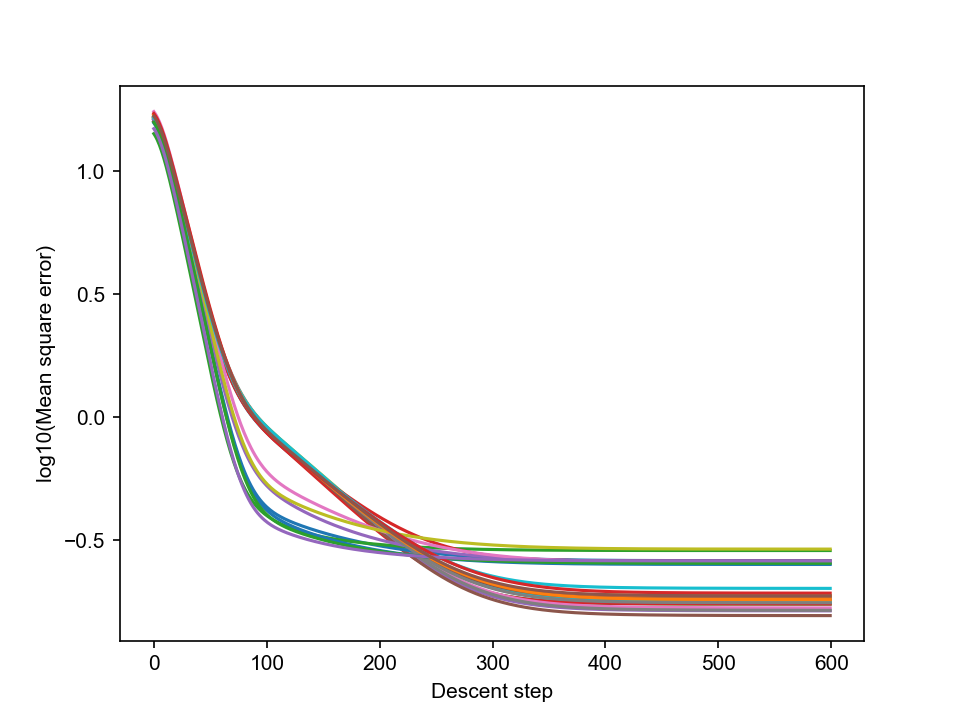

In [6]:
iq1 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg1)
iq1.quantify(**kwargs_dict)
res1 = iq1.compile_res()
iq1.plot_losses(log=True)

### Quantification 2

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<02:36,  3.82it/s]

  2%|█▊                                                                                                        | 10/600 [00:00<00:18, 32.66it/s]

  2%|██▋                                                                                                       | 15/600 [00:00<00:15, 37.99it/s]

  4%|███▉                                                                                                      | 22/600 [00:00<00:12, 45.51it/s]

  5%|████▉                                                                                                     | 28/600 [00:00<00:12, 44.47it/s]

  6%|██████                                                                                                    | 34/600 [00:00<00:11, 48.35it/s]

  7%|███████                                                                                                   | 40/600 [00:00<00:10, 51.46it/s]

  8%|████████▍                                                                                                 | 48/600 [00:01<00:09, 58.59it/s]

  9%|█████████▉                                                                                                | 56/600 [00:01<00:08, 63.51it/s]

 11%|███████████▎                                                                                              | 64/600 [00:01<00:07, 67.35it/s]

 12%|████████████▉                                                                                             | 73/600 [00:01<00:07, 71.24it/s]

 14%|██████████████▎                                                                                           | 81/600 [00:01<00:07, 72.44it/s]

 15%|███████████████▋                                                                                          | 89/600 [00:01<00:07, 70.91it/s]

 16%|█████████████████▏                                                                                        | 97/600 [00:01<00:07, 68.85it/s]

 17%|██████████████████▏                                                                                      | 104/600 [00:01<00:07, 67.58it/s]

 18%|███████████████████▍                                                                                     | 111/600 [00:01<00:07, 66.23it/s]

 20%|█████████████████████                                                                                    | 120/600 [00:02<00:06, 71.63it/s]

 21%|██████████████████████▍                                                                                  | 128/600 [00:02<00:06, 72.27it/s]

 23%|███████████████████████▊                                                                                 | 136/600 [00:02<00:06, 71.89it/s]

 24%|█████████████████████████▍                                                                               | 145/600 [00:02<00:06, 75.34it/s]

 26%|██████████████████████████▉                                                                              | 154/600 [00:02<00:05, 77.46it/s]

 27%|████████████████████████████▌                                                                            | 163/600 [00:02<00:05, 79.34it/s]

 29%|██████████████████████████████                                                                           | 172/600 [00:02<00:05, 80.36it/s]

 30%|███████████████████████████████▋                                                                         | 181/600 [00:02<00:05, 80.19it/s]

 32%|█████████████████████████████████▎                                                                       | 190/600 [00:02<00:05, 80.97it/s]

 33%|██████████████████████████████████▊                                                                      | 199/600 [00:03<00:04, 81.81it/s]

 35%|████████████████████████████████████▍                                                                    | 208/600 [00:03<00:04, 80.07it/s]

 36%|█████████████████████████████████████▉                                                                   | 217/600 [00:03<00:04, 80.70it/s]

 38%|███████████████████████████████████████▌                                                                 | 226/600 [00:03<00:04, 79.90it/s]

 39%|████████████████████████████████████████▉                                                                | 234/600 [00:03<00:04, 78.26it/s]

 40%|██████████████████████████████████████████▌                                                              | 243/600 [00:03<00:04, 79.79it/s]

 42%|████████████████████████████████████████████                                                             | 252/600 [00:03<00:04, 81.13it/s]

 44%|█████████████████████████████████████████████▋                                                           | 261/600 [00:03<00:04, 81.14it/s]

 45%|███████████████████████████████████████████████▎                                                         | 270/600 [00:03<00:04, 81.99it/s]

 46%|████████████████████████████████████████████████▊                                                        | 279/600 [00:04<00:03, 80.41it/s]

 48%|██████████████████████████████████████████████████▍                                                      | 288/600 [00:04<00:03, 79.17it/s]

 49%|███████████████████████████████████████████████████▊                                                     | 296/600 [00:04<00:03, 79.33it/s]

 51%|█████████████████████████████████████████████████████▏                                                   | 304/600 [00:04<00:03, 79.41it/s]

 52%|██████████████████████████████████████████████████████▌                                                  | 312/600 [00:04<00:03, 78.03it/s]

 53%|████████████████████████████████████████████████████████                                                 | 320/600 [00:04<00:03, 76.89it/s]

 55%|█████████████████████████████████████████████████████████▌                                               | 329/600 [00:04<00:03, 77.14it/s]

 56%|██████████████████████████████████████████████████████████▉                                              | 337/600 [00:04<00:03, 67.98it/s]

 57%|████████████████████████████████████████████████████████████▏                                            | 344/600 [00:04<00:03, 66.30it/s]

 58%|█████████████████████████████████████████████████████████████▍                                           | 351/600 [00:05<00:03, 65.27it/s]

 60%|██████████████████████████████████████████████████████████████▊                                          | 359/600 [00:05<00:03, 67.50it/s]

 61%|████████████████████████████████████████████████████████████████                                         | 366/600 [00:05<00:03, 65.28it/s]

 62%|█████████████████████████████████████████████████████████████████▎                                       | 373/600 [00:05<00:03, 59.05it/s]

 63%|██████████████████████████████████████████████████████████████████▌                                      | 380/600 [00:05<00:03, 57.94it/s]

 65%|███████████████████████████████████████████████████████████████████▉                                     | 388/600 [00:05<00:03, 61.99it/s]

 66%|█████████████████████████████████████████████████████████████████████▎                                   | 396/600 [00:05<00:03, 66.22it/s]

 67%|██████████████████████████████████████████████████████████████████████▋                                  | 404/600 [00:05<00:02, 69.03it/s]

 69%|████████████████████████████████████████████████████████████████████████                                 | 412/600 [00:05<00:02, 71.57it/s]

 70%|█████████████████████████████████████████████████████████████████████████▌                               | 420/600 [00:06<00:02, 70.68it/s]

 71%|██████████████████████████████████████████████████████████████████████████▉                              | 428/600 [00:06<00:02, 70.18it/s]

 73%|████████████████████████████████████████████████████████████████████████████▎                            | 436/600 [00:06<00:02, 70.09it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▋                           | 444/600 [00:06<00:02, 70.27it/s]

 75%|███████████████████████████████████████████████████████████████████████████████                          | 452/600 [00:06<00:02, 69.82it/s]

 76%|████████████████████████████████████████████████████████████████████████████████▎                        | 459/600 [00:06<00:02, 69.81it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▋                       | 467/600 [00:06<00:01, 69.77it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████▏                     | 475/600 [00:06<00:01, 70.22it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████▌                    | 483/600 [00:06<00:01, 72.12it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▉                   | 491/600 [00:07<00:01, 73.71it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 499/600 [00:07<00:01, 73.99it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 507/600 [00:07<00:01, 75.29it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 515/600 [00:07<00:01, 76.24it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 523/600 [00:07<00:01, 76.90it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 531/600 [00:07<00:01, 68.08it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 539/600 [00:07<00:01, 59.79it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 546/600 [00:07<00:00, 57.20it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 554/600 [00:08<00:00, 61.12it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 562/600 [00:08<00:00, 64.80it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▊     | 570/600 [00:08<00:00, 67.75it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 578/600 [00:08<00:00, 70.39it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 586/600 [00:08<00:00, 72.65it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 594/600 [00:08<00:00, 65.58it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 68.64it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

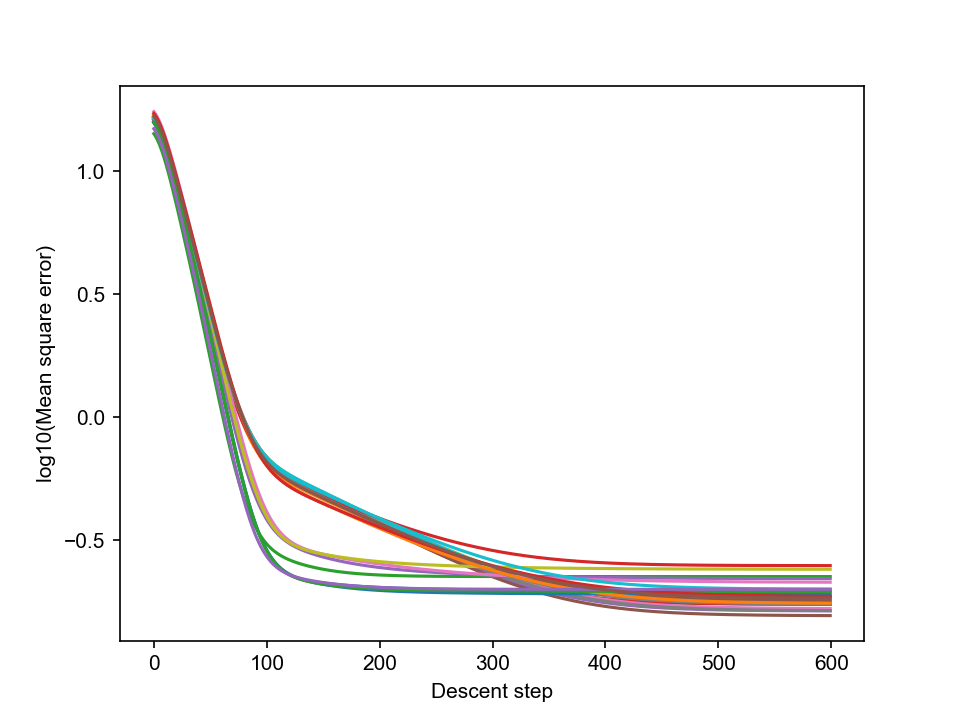

In [7]:
iq2 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg2)
iq2.quantify(**kwargs_dict)
res2 = iq2.compile_res()
iq2.plot_losses(log=True)

### Quantification 3

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<03:17,  3.03it/s]

  1%|█▍                                                                                                         | 8/600 [00:00<00:25, 23.22it/s]

  3%|██▊                                                                                                       | 16/600 [00:00<00:14, 39.41it/s]

  4%|████▏                                                                                                     | 24/600 [00:00<00:11, 50.65it/s]

  5%|█████▋                                                                                                    | 32/600 [00:00<00:09, 59.00it/s]

  7%|███████                                                                                                   | 40/600 [00:00<00:08, 65.03it/s]

  8%|████████▍                                                                                                 | 48/600 [00:00<00:08, 68.62it/s]

  9%|█████████▉                                                                                                | 56/600 [00:01<00:07, 70.45it/s]

 11%|███████████▎                                                                                              | 64/600 [00:01<00:07, 72.86it/s]

 12%|████████████▋                                                                                             | 72/600 [00:01<00:07, 74.59it/s]

 13%|██████████████▏                                                                                           | 80/600 [00:01<00:06, 75.22it/s]

 15%|███████████████▌                                                                                          | 88/600 [00:01<00:06, 75.89it/s]

 16%|████████████████▉                                                                                         | 96/600 [00:01<00:06, 76.65it/s]

 18%|██████████████████▍                                                                                      | 105/600 [00:01<00:06, 78.12it/s]

 19%|███████████████████▊                                                                                     | 113/600 [00:01<00:06, 77.79it/s]

 20%|█████████████████████▏                                                                                   | 121/600 [00:01<00:06, 77.83it/s]

 22%|██████████████████████▌                                                                                  | 129/600 [00:01<00:06, 75.98it/s]

 23%|███████████████████████▉                                                                                 | 137/600 [00:02<00:06, 76.89it/s]

 24%|█████████████████████████▍                                                                               | 145/600 [00:02<00:06, 71.51it/s]

 26%|██████████████████████████▊                                                                              | 153/600 [00:02<00:06, 67.81it/s]

 27%|████████████████████████████                                                                             | 160/600 [00:02<00:06, 62.87it/s]

 28%|█████████████████████████████▏                                                                           | 167/600 [00:02<00:07, 56.60it/s]

 29%|██████████████████████████████▍                                                                          | 174/600 [00:02<00:07, 59.00it/s]

 30%|███████████████████████████████▊                                                                         | 182/600 [00:02<00:06, 63.66it/s]

 32%|█████████████████████████████████                                                                        | 189/600 [00:02<00:06, 64.20it/s]

 33%|██████████████████████████████████▎                                                                      | 196/600 [00:03<00:07, 55.93it/s]

 34%|███████████████████████████████████▎                                                                     | 202/600 [00:03<00:07, 56.57it/s]

 35%|████████████████████████████████████▊                                                                    | 210/600 [00:03<00:06, 61.97it/s]

 36%|██████████████████████████████████████▏                                                                  | 218/600 [00:03<00:05, 66.42it/s]

 38%|███████████████████████████████████████▌                                                                 | 226/600 [00:03<00:05, 69.89it/s]

 39%|████████████████████████████████████████▉                                                                | 234/600 [00:03<00:05, 72.33it/s]

 40%|██████████████████████████████████████████▎                                                              | 242/600 [00:03<00:04, 74.16it/s]

 42%|███████████████████████████████████████████▊                                                             | 250/600 [00:03<00:04, 75.71it/s]

 43%|█████████████████████████████████████████████▏                                                           | 258/600 [00:03<00:04, 76.56it/s]

 44%|██████████████████████████████████████████████▌                                                          | 266/600 [00:04<00:04, 77.29it/s]

 46%|███████████████████████████████████████████████▉                                                         | 274/600 [00:04<00:04, 77.84it/s]

 47%|█████████████████████████████████████████████████▎                                                       | 282/600 [00:04<00:04, 77.67it/s]

 48%|██████████████████████████████████████████████████▊                                                      | 290/600 [00:04<00:04, 77.06it/s]

 50%|████████████████████████████████████████████████████▎                                                    | 299/600 [00:04<00:03, 77.87it/s]

 51%|█████████████████████████████████████████████████████▋                                                   | 307/600 [00:04<00:03, 77.30it/s]

 52%|███████████████████████████████████████████████████████▏                                                 | 315/600 [00:04<00:03, 77.76it/s]

 54%|████████████████████████████████████████████████████████▌                                                | 323/600 [00:04<00:03, 78.01it/s]

 55%|█████████████████████████████████████████████████████████▉                                               | 331/600 [00:04<00:03, 78.39it/s]

 56%|███████████████████████████████████████████████████████████▎                                             | 339/600 [00:04<00:03, 77.65it/s]

 58%|████████████████████████████████████████████████████████████▋                                            | 347/600 [00:05<00:03, 75.25it/s]

 59%|██████████████████████████████████████████████████████████████▏                                          | 355/600 [00:05<00:03, 68.37it/s]

 60%|███████████████████████████████████████████████████████████████▎                                         | 362/600 [00:05<00:03, 64.66it/s]

 62%|████████████████████████████████████████████████████████████████▉                                        | 371/600 [00:05<00:03, 69.30it/s]

 63%|██████████████████████████████████████████████████████████████████▌                                      | 380/600 [00:05<00:03, 72.65it/s]

 65%|███████████████████████████████████████████████████████████████████▉                                     | 388/600 [00:05<00:02, 74.47it/s]

 66%|█████████████████████████████████████████████████████████████████████▎                                   | 396/600 [00:05<00:02, 75.42it/s]

 67%|██████████████████████████████████████████████████████████████████████▋                                  | 404/600 [00:05<00:02, 76.54it/s]

 69%|████████████████████████████████████████████████████████████████████████                                 | 412/600 [00:06<00:02, 75.82it/s]

 70%|█████████████████████████████████████████████████████████████████████████▌                               | 420/600 [00:06<00:02, 76.77it/s]

 71%|██████████████████████████████████████████████████████████████████████████▉                              | 428/600 [00:06<00:02, 77.33it/s]

 73%|████████████████████████████████████████████████████████████████████████████▎                            | 436/600 [00:06<00:02, 78.00it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▋                           | 444/600 [00:06<00:01, 78.27it/s]

 75%|███████████████████████████████████████████████████████████████████████████████                          | 452/600 [00:06<00:01, 78.42it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▌                        | 460/600 [00:06<00:01, 78.54it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████                       | 469/600 [00:06<00:01, 78.93it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▍                     | 477/600 [00:06<00:01, 77.10it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 485/600 [00:06<00:01, 75.25it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 493/600 [00:07<00:01, 74.27it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▋                 | 501/600 [00:07<00:01, 73.78it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████                | 509/600 [00:07<00:01, 73.54it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▍              | 517/600 [00:07<00:01, 72.44it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▉             | 525/600 [00:07<00:01, 71.13it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▎           | 533/600 [00:07<00:00, 70.36it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 541/600 [00:07<00:00, 70.74it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████         | 549/600 [00:07<00:00, 71.37it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▍       | 557/600 [00:07<00:00, 72.52it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▉      | 565/600 [00:08<00:00, 73.77it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 573/600 [00:08<00:00, 74.70it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 581/600 [00:08<00:00, 75.89it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████  | 589/600 [00:08<00:00, 76.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:08<00:00, 74.89it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 70.42it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

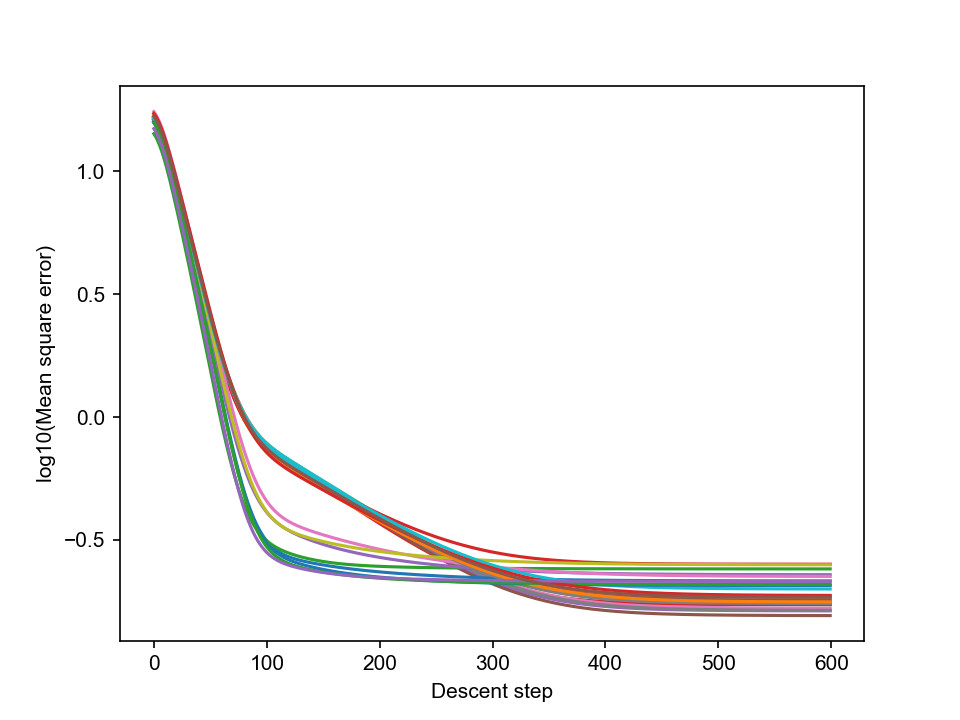

In [8]:
iq3 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg3)
iq3.quantify(**kwargs_dict)
res3 = iq3.compile_res()
iq3.plot_losses(log=True)

### Quantification 4

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<02:30,  3.97it/s]

  2%|█▌                                                                                                         | 9/600 [00:00<00:18, 31.36it/s]

  3%|███                                                                                                       | 17/600 [00:00<00:12, 47.07it/s]

  4%|████▍                                                                                                     | 25/600 [00:00<00:10, 56.87it/s]

  6%|█████▊                                                                                                    | 33/600 [00:00<00:08, 63.55it/s]

  7%|███████▏                                                                                                  | 41/600 [00:00<00:08, 68.27it/s]

  8%|████████▋                                                                                                 | 49/600 [00:00<00:07, 71.11it/s]

 10%|██████████                                                                                                | 57/600 [00:01<00:08, 64.15it/s]

 11%|███████████▎                                                                                              | 64/600 [00:01<00:08, 64.88it/s]

 12%|████████████▌                                                                                             | 71/600 [00:01<00:08, 64.67it/s]

 13%|█████████████▊                                                                                            | 78/600 [00:01<00:09, 55.03it/s]

 14%|██████████████▊                                                                                           | 84/600 [00:01<00:09, 55.20it/s]

 15%|████████████████▎                                                                                         | 92/600 [00:01<00:08, 59.89it/s]

 17%|█████████████████▌                                                                                       | 100/600 [00:01<00:07, 64.53it/s]

 18%|██████████████████▉                                                                                      | 108/600 [00:01<00:07, 68.32it/s]

 19%|████████████████████▎                                                                                    | 116/600 [00:01<00:06, 69.51it/s]

 21%|█████████████████████▋                                                                                   | 124/600 [00:02<00:06, 71.51it/s]

 22%|███████████████████████                                                                                  | 132/600 [00:02<00:06, 72.85it/s]

 23%|████████████████████████▌                                                                                | 140/600 [00:02<00:06, 74.24it/s]

 25%|█████████████████████████▉                                                                               | 148/600 [00:02<00:05, 75.35it/s]

 26%|███████████████████████████▎                                                                             | 156/600 [00:02<00:05, 76.01it/s]

 27%|████████████████████████████▋                                                                            | 164/600 [00:02<00:05, 75.80it/s]

 29%|██████████████████████████████                                                                           | 172/600 [00:02<00:05, 76.49it/s]

 30%|███████████████████████████████▌                                                                         | 180/600 [00:02<00:06, 69.38it/s]

 31%|████████████████████████████████▉                                                                        | 188/600 [00:02<00:06, 60.27it/s]

 33%|██████████████████████████████████▎                                                                      | 196/600 [00:03<00:06, 63.03it/s]

 34%|███████████████████████████████████▌                                                                     | 203/600 [00:03<00:06, 64.08it/s]

 35%|████████████████████████████████████▊                                                                    | 210/600 [00:03<00:05, 65.30it/s]

 36%|█████████████████████████████████████▉                                                                   | 217/600 [00:03<00:05, 64.40it/s]

 37%|███████████████████████████████████████▏                                                                 | 224/600 [00:03<00:05, 65.36it/s]

 39%|████████████████████████████████████████▊                                                                | 233/600 [00:03<00:05, 70.56it/s]

 40%|██████████████████████████████████████████▏                                                              | 241/600 [00:03<00:04, 71.87it/s]

 42%|███████████████████████████████████████████▌                                                             | 249/600 [00:03<00:04, 73.06it/s]

 43%|████████████████████████████████████████████▉                                                            | 257/600 [00:03<00:04, 72.97it/s]

 44%|██████████████████████████████████████████████▍                                                          | 265/600 [00:04<00:04, 71.40it/s]

 46%|███████████████████████████████████████████████▊                                                         | 273/600 [00:04<00:05, 63.99it/s]

 47%|█████████████████████████████████████████████████                                                        | 280/600 [00:04<00:05, 63.61it/s]

 48%|██████████████████████████████████████████████████▏                                                      | 287/600 [00:04<00:04, 63.95it/s]

 49%|███████████████████████████████████████████████████▍                                                     | 294/600 [00:04<00:04, 62.95it/s]

 50%|████████████████████████████████████████████████████▋                                                    | 301/600 [00:04<00:04, 63.29it/s]

 51%|█████████████████████████████████████████████████████▉                                                   | 308/600 [00:04<00:04, 59.01it/s]

 52%|███████████████████████████████████████████████████████▏                                                 | 315/600 [00:04<00:04, 59.46it/s]

 54%|████████████████████████████████████████████████████████▎                                                | 322/600 [00:05<00:04, 59.98it/s]

 55%|█████████████████████████████████████████████████████████▌                                               | 329/600 [00:05<00:04, 60.88it/s]

 56%|██████████████████████████████████████████████████████████▊                                              | 336/600 [00:05<00:04, 60.26it/s]

 57%|████████████████████████████████████████████████████████████▏                                            | 344/600 [00:05<00:03, 64.16it/s]

 59%|█████████████████████████████████████████████████████████████▌                                           | 352/600 [00:05<00:03, 68.48it/s]

 60%|███████████████████████████████████████████████████████████████                                          | 360/600 [00:05<00:03, 62.98it/s]

 61%|████████████████████████████████████████████████████████████████▏                                        | 367/600 [00:05<00:04, 56.93it/s]

 62%|█████████████████████████████████████████████████████████████████▋                                       | 375/600 [00:05<00:03, 60.27it/s]

 64%|██████████████████████████████████████████████████████████████████▊                                      | 382/600 [00:06<00:03, 59.24it/s]

 65%|████████████████████████████████████████████████████████████████████▎                                    | 390/600 [00:06<00:03, 62.77it/s]

 66%|█████████████████████████████████████████████████████████████████████▍                                   | 397/600 [00:06<00:03, 60.86it/s]

 67%|██████████████████████████████████████████████████████████████████████▋                                  | 404/600 [00:06<00:03, 61.01it/s]

 68%|███████████████████████████████████████████████████████████████████████▉                                 | 411/600 [00:06<00:03, 57.67it/s]

 70%|████████████████████████████████████████████████████████████████████████▉                                | 417/600 [00:06<00:03, 50.86it/s]

 70%|██████████████████████████████████████████████████████████████████████████                               | 423/600 [00:06<00:04, 39.89it/s]

 71%|██████████████████████████████████████████████████████████████████████████▉                              | 428/600 [00:07<00:04, 38.63it/s]

 72%|███████████████████████████████████████████████████████████████████████████▊                             | 433/600 [00:07<00:04, 37.55it/s]

 73%|█████████████████████████████████████████████████████████████████████████████                            | 440/600 [00:07<00:03, 44.32it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 448/600 [00:07<00:02, 51.37it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▊                         | 456/600 [00:07<00:02, 57.07it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 464/600 [00:07<00:02, 61.26it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████▍                      | 471/600 [00:07<00:02, 63.53it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▊                     | 479/600 [00:07<00:01, 65.65it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████                    | 486/600 [00:07<00:01, 66.74it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 493/600 [00:08<00:01, 67.42it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 500/600 [00:08<00:01, 66.66it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 507/600 [00:08<00:01, 62.45it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▉               | 514/600 [00:08<00:01, 64.50it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▏             | 521/600 [00:08<00:01, 65.64it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 528/600 [00:08<00:01, 57.34it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 534/600 [00:08<00:01, 49.60it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▌          | 540/600 [00:08<00:01, 48.73it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 546/600 [00:09<00:01, 51.07it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████▌        | 552/600 [00:09<00:00, 52.13it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 560/600 [00:09<00:00, 58.46it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▌     | 569/600 [00:09<00:00, 64.83it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 577/600 [00:09<00:00, 67.16it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 584/600 [00:09<00:00, 67.69it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 592/600 [00:09<00:00, 68.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:09<00:00, 69.19it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 61.28it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

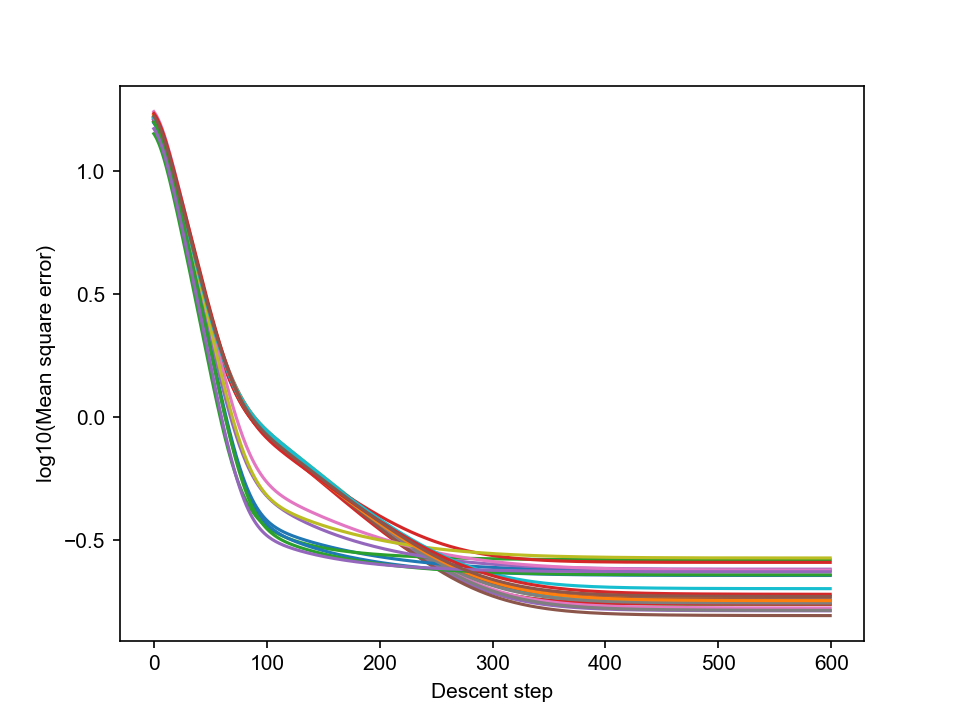

In [9]:
iq4 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg4)
iq4.quantify(**kwargs_dict)
res4 = iq4.compile_res()
iq4.plot_losses(log=True)

### Quantification 5

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<03:30,  2.85it/s]

  2%|█▌                                                                                                         | 9/600 [00:00<00:24, 24.56it/s]

  3%|███                                                                                                       | 17/600 [00:00<00:14, 39.31it/s]

  4%|████▍                                                                                                     | 25/600 [00:00<00:11, 49.52it/s]

  5%|█████▋                                                                                                    | 32/600 [00:00<00:10, 55.20it/s]

  7%|███████                                                                                                   | 40/600 [00:00<00:09, 59.85it/s]

  8%|████████▎                                                                                                 | 47/600 [00:00<00:08, 62.62it/s]

  9%|█████████▋                                                                                                | 55/600 [00:01<00:08, 65.53it/s]

 10%|███████████▏                                                                                              | 63/600 [00:01<00:07, 67.71it/s]

 12%|████████████▌                                                                                             | 71/600 [00:01<00:07, 68.80it/s]

 13%|█████████████▉                                                                                            | 79/600 [00:01<00:07, 68.12it/s]

 14%|███████████████▎                                                                                          | 87/600 [00:01<00:07, 70.03it/s]

 16%|████████████████▊                                                                                         | 95/600 [00:01<00:07, 70.24it/s]

 17%|██████████████████                                                                                       | 103/600 [00:01<00:08, 56.36it/s]

 18%|███████████████████▎                                                                                     | 110/600 [00:02<00:12, 40.51it/s]

 19%|████████████████████▏                                                                                    | 115/600 [00:02<00:12, 39.96it/s]

 20%|█████████████████████                                                                                    | 120/600 [00:02<00:11, 40.11it/s]

 21%|█████████████████████▉                                                                                   | 125/600 [00:02<00:14, 32.82it/s]

 22%|██████████████████████▌                                                                                  | 129/600 [00:02<00:13, 33.65it/s]

 22%|███████████████████████▋                                                                                 | 135/600 [00:02<00:11, 39.18it/s]

 24%|█████████████████████████                                                                                | 143/600 [00:02<00:09, 47.17it/s]

 25%|██████████████████████████▍                                                                              | 151/600 [00:03<00:08, 54.13it/s]

 26%|███████████████████████████▊                                                                             | 159/600 [00:03<00:07, 59.46it/s]

 28%|█████████████████████████████▏                                                                           | 167/600 [00:03<00:06, 63.63it/s]

 29%|██████████████████████████████▋                                                                          | 175/600 [00:03<00:06, 66.52it/s]

 30%|████████████████████████████████                                                                         | 183/600 [00:03<00:06, 68.94it/s]

 32%|█████████████████████████████████▍                                                                       | 191/600 [00:03<00:05, 69.95it/s]

 33%|██████████████████████████████████▊                                                                      | 199/600 [00:03<00:06, 65.96it/s]

 34%|████████████████████████████████████                                                                     | 206/600 [00:03<00:05, 66.87it/s]

 36%|█████████████████████████████████████▍                                                                   | 214/600 [00:03<00:05, 69.02it/s]

 37%|██████████████████████████████████████▊                                                                  | 222/600 [00:04<00:05, 70.62it/s]

 38%|████████████████████████████████████████▎                                                                | 230/600 [00:04<00:05, 71.38it/s]

 40%|█████████████████████████████████████████▋                                                               | 238/600 [00:04<00:05, 71.83it/s]

 41%|███████████████████████████████████████████                                                              | 246/600 [00:04<00:04, 71.77it/s]

 42%|████████████████████████████████████████████▍                                                            | 254/600 [00:04<00:04, 72.75it/s]

 44%|█████████████████████████████████████████████▊                                                           | 262/600 [00:04<00:04, 72.79it/s]

 45%|███████████████████████████████████████████████▎                                                         | 270/600 [00:04<00:04, 73.27it/s]

 46%|████████████████████████████████████████████████▋                                                        | 278/600 [00:04<00:04, 72.88it/s]

 48%|██████████████████████████████████████████████████                                                       | 286/600 [00:04<00:04, 72.35it/s]

 49%|███████████████████████████████████████████████████▍                                                     | 294/600 [00:05<00:04, 72.94it/s]

 50%|████████████████████████████████████████████████████▊                                                    | 302/600 [00:05<00:04, 73.06it/s]

 52%|██████████████████████████████████████████████████████▎                                                  | 310/600 [00:05<00:03, 73.37it/s]

 53%|███████████████████████████████████████████████████████▋                                                 | 318/600 [00:05<00:03, 72.78it/s]

 54%|█████████████████████████████████████████████████████████                                                | 326/600 [00:05<00:03, 73.31it/s]

 56%|██████████████████████████████████████████████████████████▍                                              | 334/600 [00:05<00:03, 73.05it/s]

 57%|███████████████████████████████████████████████████████████▊                                             | 342/600 [00:05<00:03, 74.86it/s]

 58%|█████████████████████████████████████████████████████████████▎                                           | 350/600 [00:05<00:03, 74.92it/s]

 60%|██████████████████████████████████████████████████████████████▋                                          | 358/600 [00:05<00:03, 74.31it/s]

 61%|████████████████████████████████████████████████████████████████                                         | 366/600 [00:06<00:03, 74.78it/s]

 62%|█████████████████████████████████████████████████████████████████▍                                       | 374/600 [00:06<00:03, 74.96it/s]

 64%|██████████████████████████████████████████████████████████████████▊                                      | 382/600 [00:06<00:02, 74.23it/s]

 65%|████████████████████████████████████████████████████████████████████▎                                    | 390/600 [00:06<00:02, 74.55it/s]

 66%|█████████████████████████████████████████████████████████████████████▋                                   | 398/600 [00:06<00:02, 75.15it/s]

 68%|███████████████████████████████████████████████████████████████████████                                  | 406/600 [00:06<00:02, 75.95it/s]

 69%|████████████████████████████████████████████████████████████████████████▍                                | 414/600 [00:06<00:02, 76.42it/s]

 70%|█████████████████████████████████████████████████████████████████████████▊                               | 422/600 [00:06<00:02, 76.49it/s]

 72%|███████████████████████████████████████████████████████████████████████████▎                             | 430/600 [00:06<00:02, 77.17it/s]

 73%|████████████████████████████████████████████████████████████████████████████▋                            | 438/600 [00:06<00:02, 77.90it/s]

 74%|██████████████████████████████████████████████████████████████████████████████▏                          | 447/600 [00:07<00:01, 79.41it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▊                         | 456/600 [00:07<00:01, 79.69it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▍                       | 465/600 [00:07<00:01, 80.41it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 474/600 [00:07<00:01, 80.13it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████▌                    | 483/600 [00:07<00:01, 80.65it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████                   | 492/600 [00:07<00:01, 79.28it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 500/600 [00:07<00:01, 78.83it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 508/600 [00:07<00:01, 78.31it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 516/600 [00:07<00:01, 77.23it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▋             | 524/600 [00:08<00:00, 77.15it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████            | 532/600 [00:08<00:00, 75.12it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████▌          | 540/600 [00:08<00:00, 73.85it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 548/600 [00:08<00:00, 74.52it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▎       | 556/600 [00:08<00:00, 74.51it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▉      | 565/600 [00:08<00:00, 77.24it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 574/600 [00:08<00:00, 78.61it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████   | 583/600 [00:08<00:00, 80.29it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 592/600 [00:08<00:00, 77.96it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 77.53it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 66.19it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

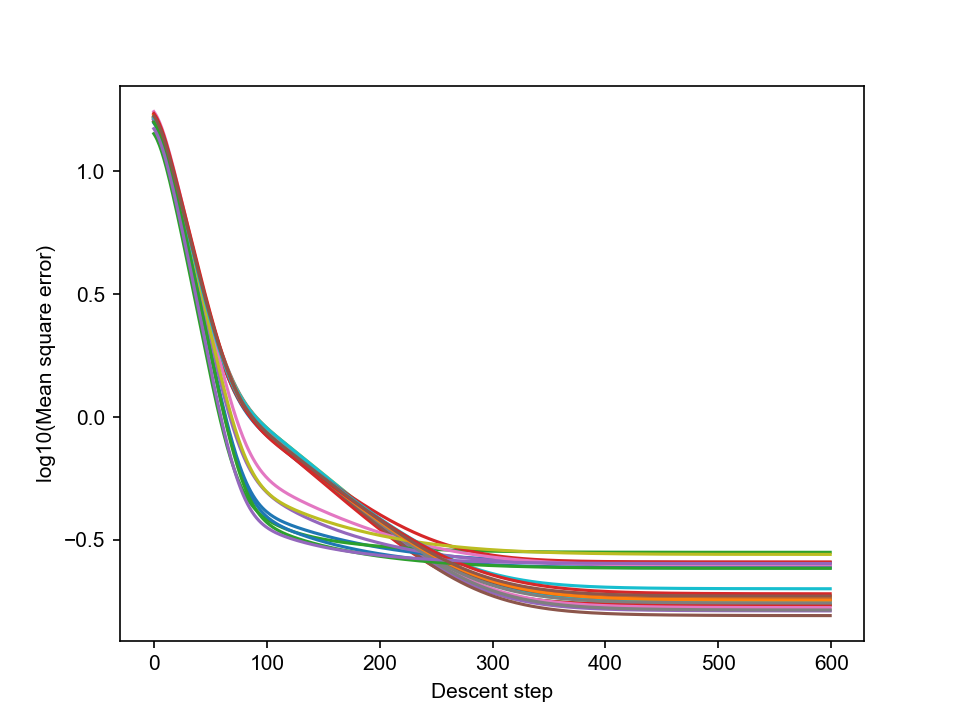

In [10]:
iq5 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg5)
iq5.quantify(**kwargs_dict)
res5 = iq5.compile_res()
iq5.plot_losses(log=True)

### Quantification 6

  0%|                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                          | 1/600 [00:00<02:32,  3.93it/s]

  2%|█▌                                                                                                         | 9/600 [00:00<00:19, 31.02it/s]

  3%|███                                                                                                       | 17/600 [00:00<00:12, 46.75it/s]

  4%|████▍                                                                                                     | 25/600 [00:00<00:10, 56.96it/s]

  6%|█████▊                                                                                                    | 33/600 [00:00<00:08, 63.70it/s]

  7%|███████▏                                                                                                  | 41/600 [00:00<00:08, 68.42it/s]

  8%|████████▋                                                                                                 | 49/600 [00:00<00:07, 70.92it/s]

 10%|██████████                                                                                                | 57/600 [00:00<00:07, 73.23it/s]

 11%|███████████▍                                                                                              | 65/600 [00:01<00:07, 75.23it/s]

 12%|████████████▉                                                                                             | 73/600 [00:01<00:07, 72.86it/s]

 14%|██████████████▎                                                                                           | 81/600 [00:01<00:07, 73.03it/s]

 15%|███████████████▋                                                                                          | 89/600 [00:01<00:06, 73.87it/s]

 16%|█████████████████▏                                                                                        | 97/600 [00:01<00:06, 75.00it/s]

 18%|██████████████████▍                                                                                      | 105/600 [00:01<00:06, 75.35it/s]

 19%|███████████████████▊                                                                                     | 113/600 [00:01<00:06, 76.03it/s]

 20%|█████████████████████▏                                                                                   | 121/600 [00:01<00:06, 75.68it/s]

 22%|██████████████████████▌                                                                                  | 129/600 [00:01<00:06, 76.67it/s]

 23%|████████████████████████▏                                                                                | 138/600 [00:02<00:05, 78.02it/s]

 24%|█████████████████████████▌                                                                               | 146/600 [00:02<00:05, 77.82it/s]

 26%|██████████████████████████▉                                                                              | 154/600 [00:02<00:05, 77.25it/s]

 27%|████████████████████████████▎                                                                            | 162/600 [00:02<00:05, 77.41it/s]

 28%|█████████████████████████████▊                                                                           | 170/600 [00:02<00:05, 77.97it/s]

 30%|███████████████████████████████▏                                                                         | 178/600 [00:02<00:05, 74.01it/s]

 31%|████████████████████████████████▌                                                                        | 186/600 [00:02<00:05, 75.20it/s]

 32%|██████████████████████████████████▏                                                                      | 195/600 [00:02<00:05, 75.91it/s]

 34%|███████████████████████████████████▌                                                                     | 203/600 [00:02<00:05, 72.27it/s]

 35%|█████████████████████████████████████                                                                    | 212/600 [00:03<00:05, 74.90it/s]

 37%|██████████████████████████████████████▌                                                                  | 220/600 [00:03<00:05, 75.60it/s]

 38%|████████████████████████████████████████                                                                 | 229/600 [00:03<00:04, 77.88it/s]

 40%|█████████████████████████████████████████▋                                                               | 238/600 [00:03<00:04, 78.99it/s]

 41%|███████████████████████████████████████████▏                                                             | 247/600 [00:03<00:04, 80.03it/s]

 43%|████████████████████████████████████████████▊                                                            | 256/600 [00:03<00:04, 78.66it/s]

 44%|██████████████████████████████████████████████▏                                                          | 264/600 [00:03<00:04, 76.91it/s]

 45%|███████████████████████████████████████████████▌                                                         | 272/600 [00:03<00:04, 75.46it/s]

 47%|█████████████████████████████████████████████████                                                        | 280/600 [00:03<00:04, 75.05it/s]

 48%|██████████████████████████████████████████████████▍                                                      | 288/600 [00:04<00:04, 75.78it/s]

 49%|███████████████████████████████████████████████████▊                                                     | 296/600 [00:04<00:03, 76.59it/s]

 51%|█████████████████████████████████████████████████████▏                                                   | 304/600 [00:04<00:03, 75.00it/s]

 52%|██████████████████████████████████████████████████████▌                                                  | 312/600 [00:04<00:04, 70.36it/s]

 53%|████████████████████████████████████████████████████████                                                 | 320/600 [00:04<00:03, 72.21it/s]

 55%|█████████████████████████████████████████████████████████▍                                               | 328/600 [00:04<00:03, 71.69it/s]

 56%|██████████████████████████████████████████████████████████▊                                              | 336/600 [00:04<00:03, 71.77it/s]

 57%|████████████████████████████████████████████████████████████▏                                            | 344/600 [00:04<00:03, 70.55it/s]

 59%|█████████████████████████████████████████████████████████████▌                                           | 352/600 [00:04<00:03, 71.61it/s]

 60%|███████████████████████████████████████████████████████████████                                          | 360/600 [00:05<00:03, 73.72it/s]

 61%|████████████████████████████████████████████████████████████████▍                                        | 368/600 [00:05<00:03, 75.21it/s]

 63%|█████████████████████████████████████████████████████████████████▊                                       | 376/600 [00:05<00:02, 74.83it/s]

 64%|███████████████████████████████████████████████████████████████████▏                                     | 384/600 [00:05<00:02, 75.17it/s]

 65%|████████████████████████████████████████████████████████████████████▌                                    | 392/600 [00:05<00:02, 75.62it/s]

 67%|██████████████████████████████████████████████████████████████████████                                   | 400/600 [00:05<00:02, 76.48it/s]

 68%|███████████████████████████████████████████████████████████████████████▍                                 | 408/600 [00:05<00:02, 74.06it/s]

 69%|████████████████████████████████████████████████████████████████████████▊                                | 416/600 [00:05<00:02, 73.02it/s]

 71%|██████████████████████████████████████████████████████████████████████████▏                              | 424/600 [00:05<00:02, 72.27it/s]

 72%|███████████████████████████████████████████████████████████████████████████▌                             | 432/600 [00:05<00:02, 70.89it/s]

 73%|█████████████████████████████████████████████████████████████████████████████                            | 440/600 [00:06<00:02, 72.28it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 448/600 [00:06<00:02, 73.31it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▊                         | 456/600 [00:06<00:01, 75.06it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 464/600 [00:06<00:01, 76.42it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▌                      | 472/600 [00:06<00:01, 76.42it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████                     | 480/600 [00:06<00:01, 76.72it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████▍                   | 488/600 [00:06<00:01, 77.06it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▊                  | 496/600 [00:06<00:01, 76.94it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 504/600 [00:06<00:01, 76.71it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 512/600 [00:07<00:01, 77.23it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████              | 520/600 [00:07<00:01, 77.71it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 528/600 [00:07<00:00, 77.00it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████▊           | 536/600 [00:07<00:00, 77.33it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 544/600 [00:07<00:00, 75.03it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████▌        | 552/600 [00:07<00:00, 75.53it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 560/600 [00:07<00:00, 76.21it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▍     | 568/600 [00:07<00:00, 77.01it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 576/600 [00:07<00:00, 76.98it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 584/600 [00:07<00:00, 77.23it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 592/600 [00:08<00:00, 77.50it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 77.42it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 73.47it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

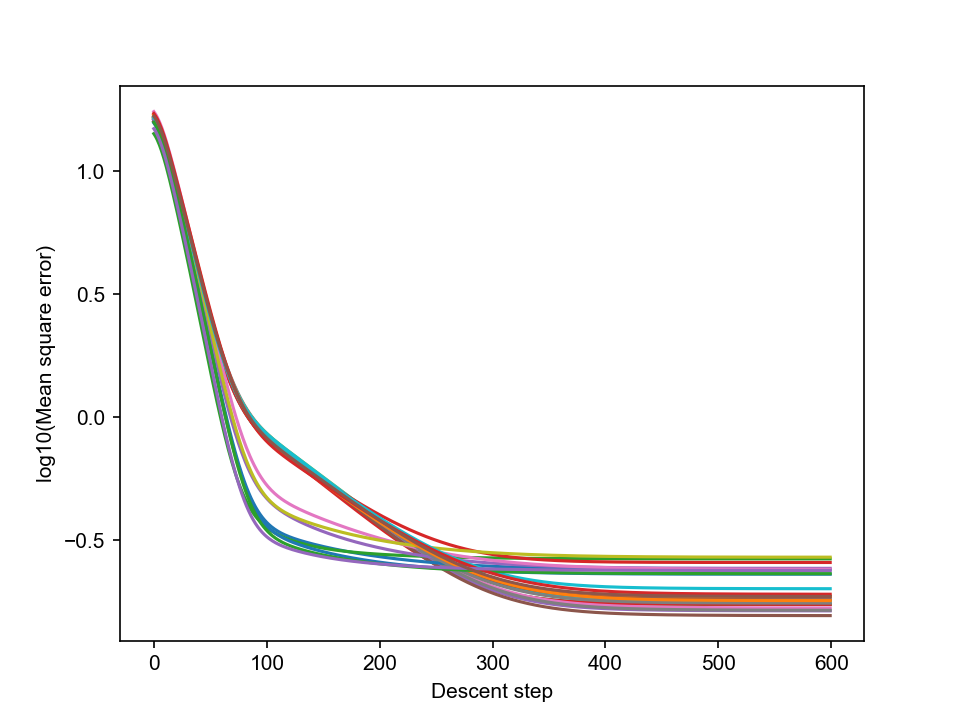

In [11]:
iq6 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg6)
iq6.quantify(**kwargs_dict)
res6 = iq6.compile_res()
iq6.plot_losses(log=True)

### Get calibrations

In [12]:
def calculate_calibration(res):
    mems = res.groupby("EmbryoID")["Membrane signal"].mean()
    cyts = res.groupby("EmbryoID")["Cytoplasmic signal"].mean()
    pre_post = [p.split("/")[-1] for p in paths]
    embryos = [p.split("/")[-2] for p in paths]
    lines = [p.split("/")[-3].split("_")[1] for p in paths]

    df_dict = {
        "Line": lines,
        "Embryo": embryos,
        "Exposure": pre_post,
        "Membrane": mems,
        "Cytoplasm": cyts,
    }
    df = pd.DataFrame(df_dict)

    pre = df.groupby(["Line", "Embryo"]).last()
    post = df.groupby(["Line", "Embryo"]).first()
    df = pd.DataFrame(
        {
            "mem_pre": pre.Membrane,
            "mem_post": post.Membrane,
            "cyt_pre": pre.Cytoplasm,
            "cyt_post": post.Cytoplasm,
        }
    )
    df.to_csv("temp.csv")
    df = pd.read_csv("temp.csv")
    os.remove("temp.csv")
    return df

In [13]:
df0 = calculate_calibration(res0)
df1 = calculate_calibration(res1)
df2 = calculate_calibration(res2)
df3 = calculate_calibration(res3)
df4 = calculate_calibration(res4)
df5 = calculate_calibration(res5)
df6 = calculate_calibration(res6)

In [14]:
# Mean and standard deviation for all the calibrations


def calculate_mean_std(df):
    c = df[df.Line == "sv2061"].apply(
        lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1
    )
    return np.mean(c), np.std(c)


means, stds = zip(
    *[calculate_mean_std(df) for df in [df0, df1, df2, df3, df4, df5, df6]]
)
print(means[-1], stds[-1])
np.savetxt("../../data/calibration_constants.txt", means)

3.105837611328295 0.28318603898253947


In [15]:
# Saving full results for calibration 6 (will use later in a figure)
df6.to_csv("../../data/calibration_quantification6.csv", index=False)